### Code executors

[tutorial](https://microsoft.github.io/autogen/0.2/docs/tutorial/code-executors)

Now, agent can not only reply but also **use code execution env**

#### What is it

It is an autogen agent component.

The component takes an input message (ex : one with code in it), it runs code and returns a message with results.

2 built-in executors
1. CMD env.
2. Jupyter env.

**<u>Jupyter,ipython,ipykernel first principles</u>**

* Jupyter is a computing environment (the whole package) that provides notebooks (.ipynb), web UI, and the messaging protocol for talking to "kernels".
* "Kernels" are nothing but python processes running in the backend (like .exe in task mgr).
* ipykernel is the specific python kernel implementation for jupyter. It actually **runs** your python code and executes it.
* IPython is a python REPL but upgraded so that it has special features like formatting, magic commands, tracebacks and tab completion.
* So jupyter - the whole. ipykernel - the processing. ipython - Advanced REPL (interactive environment)

For both executors, 2 ways to execute code
1. Docker
2. Local

Local is for dev & testing - not ideal for production.

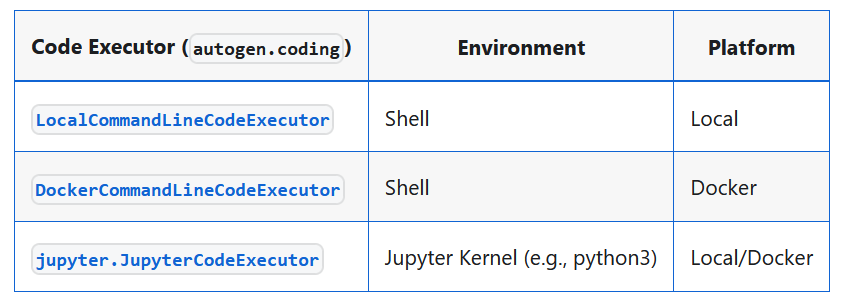

**This chapter : CMD executor only**

### Local execution

Below architecture diagram shows how the **localCMDExecutor** works

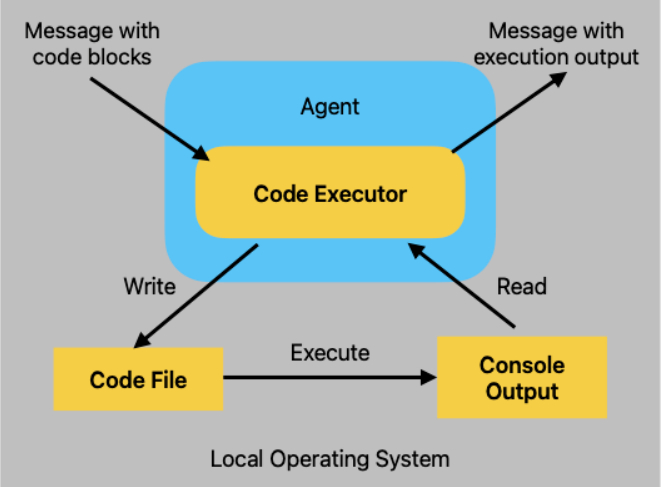

Process is very self-explanatory from the diagram. 

Msg with code -> agent creates file -> runs -> reads results -> returns as output msg.

#### Python example

In [6]:
! pip install -qqq matplotlib numpy

In [1]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

D:\Github\autogen-quickstart\venv\lib\site-packages\flaml\__init__.py:20: UserWarning: flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.
  warnings.warn("flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.")


In [8]:
temp_dir

<TemporaryDirectory 'C:\\Users\\cgokh\\AppData\\Local\\Temp\\tmpi_su_8f0'>

In [5]:
# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [10]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')
```
This is the end of the message.
"""

# Generate a reply for the given code.
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)

Replying as code_executor_agent. Provide feedback to the sender. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



Plot is created in temp directory

In [11]:
import os

print(os.listdir(temp_dir.name))

['scatter.png', 'tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py']


Cleanup working dir

In [12]:
temp_dir.cleanup()

### Docker Execution

-- done till here